# Family Classification with Decision Trees
 
 * I don't see how random forests help here. We are not interested in the classification per se, only in what we can learn from the classification rules. So in any event, we can only look at one tree at a time, and even that maybe a little too complicated. 
 
 
 * (1) Shows a few examples with WO featues alone 
     
 
 * (2) Shows a few without WO
 
 * (3) Shows an example with Phonology features alone
 
 
 * The classification is far from perfect. If we want to pursue the decision trees method, we have to develop a procedure for searching for interesting trees &mdash; in that maybe a random forest could help. 
 
 
 * In these exmples, it doesn't seem that WO separates better; Consider only the trees with 3 famileis: In [7], In [14] &mdash; only word order, In [26] &mdash; no word order and In [30] &mdash; only phonology.


In [1]:
library(rpart)
library(rpart.plot)
wals <- read.csv('wals.csv')
binwals <- read.csv('binarized-wals.csv')

In [2]:
colnames(wals) <- sub("(X[0-9]+[A-Z])(.*)","\\1",colnames(wals))
binwals$X <- NULL

# 1. Only Word Order
## Search Criteria:
 - Word Order only
 - At least 65 languages in most frequent family
 - At least count(top-family) * 0.7 languages in the second and third families

## Maximal Feature Groups that Meat These Criteria:

In [3]:
g1 = c('143A', '143E', '143F', '143G', '82A', '83A', '89A') 
g2 = c('143A', '143E', '143F', '143G', '83A', '89A')

In [4]:
chunk_wals <- function(cols,supp) {
    cols <- unlist(lapply(cols,function(f){paste('X',f,sep="")}))
    wals[rowSums(binwals[,cols]) >= length(cols),c(cols,supp)]
}

In [5]:
example1 = chunk_wals(g1,'family')
head(summary(example1$family))

Austronesian      Niger-Congo     Sino-Tibetan     Afro-Asiatic 
             135              116               97               59 
   Indo-European Trans-New Guinea 
              56               43

In [6]:
exampletree <- function(langs,wals_chunk,cp=0.01,minsplit=8) {
    dat <- wals_chunk[wals_chunk$family %in% langs,]
    dat$family <-  droplevels(dat$family)
    dat <- lapply(dat,as.factor)
    tree <- rpart(family ~ ., data = dat,control=c(minsplit=minsplit,cp=cp),method='class')
    tree
}
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan'),example1)

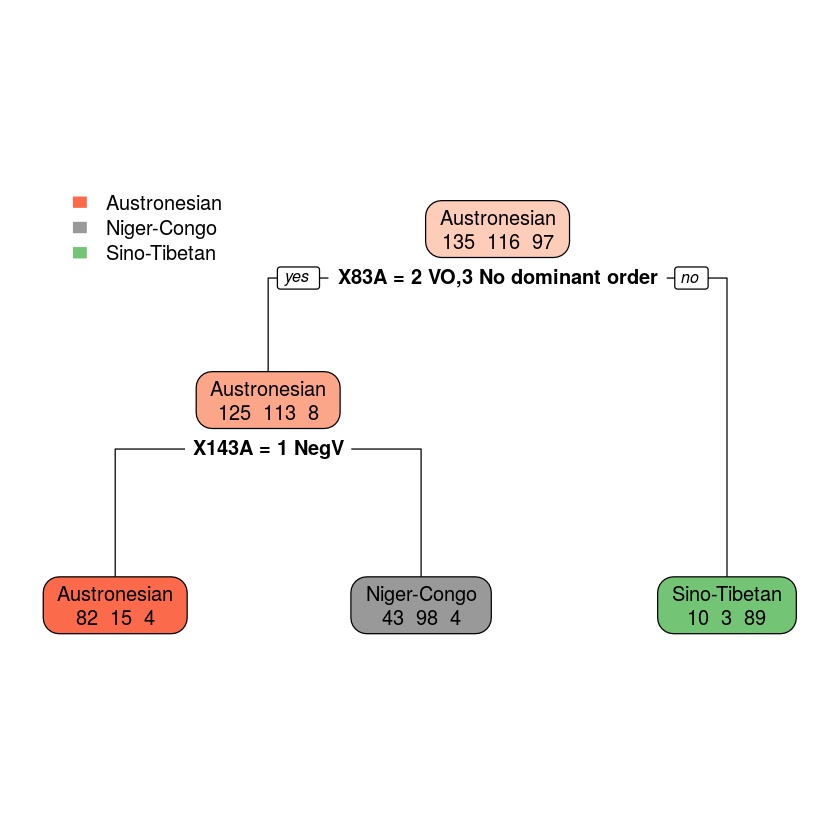

In [7]:
rpart.plot(tree,extra = 1)

In [8]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X143A X83A 

Root node error: 213/348 = 0.61207

n= 348 

       CP nsplit rel error  xerror     xstd
1 0.37089      0   1.00000 1.00000 0.042676
2 0.25822      1   0.62911 0.62911 0.042618
3 0.01000      2   0.37089 0.38967 0.037324


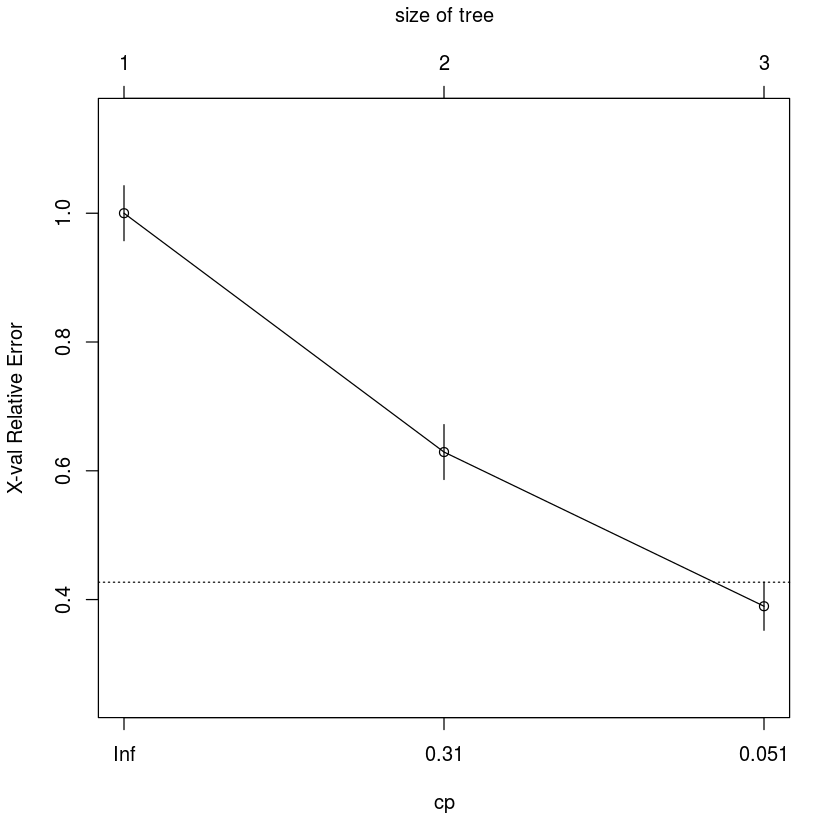

In [9]:
plotcp(tree)

In [10]:
example2 = chunk_wals(g2,'family')
head(summary(example2$family))

Austronesian      Niger-Congo     Sino-Tibetan     Afro-Asiatic 
             135              119               97               61 
   Indo-European Trans-New Guinea 
              56               43

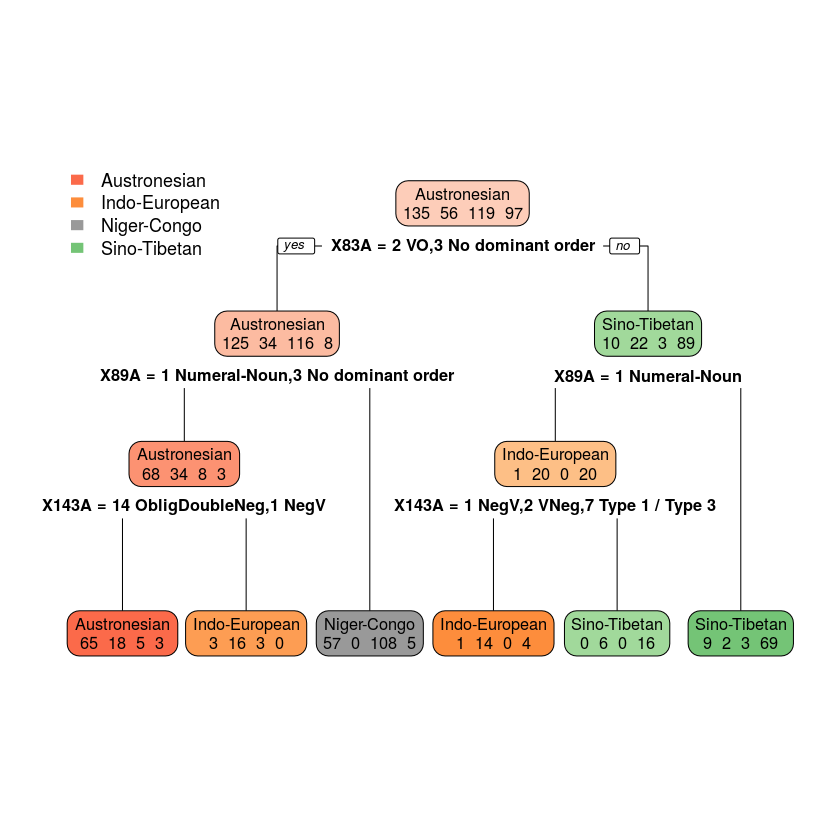

In [11]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Indo-European'),example2)
rpart.plot(tree,extra = 1)

In [12]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X143A X83A  X89A 

Root node error: 272/407 = 0.6683

n= 407 

        CP nsplit rel error  xerror     xstd
1 0.290441      0   1.00000 1.00000 0.034921
2 0.187500      1   0.70956 0.70956 0.037036
3 0.047794      2   0.52206 0.53309 0.035520
4 0.018382      3   0.47426 0.49632 0.034921
5 0.010000      5   0.43750 0.52206 0.035351


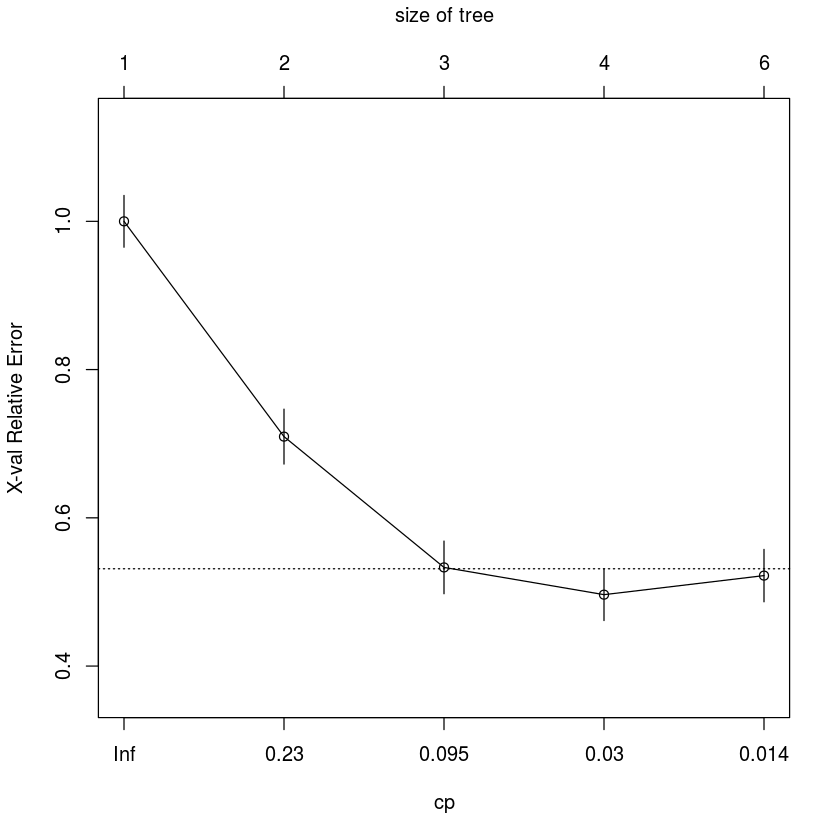

In [13]:
plotcp(tree)

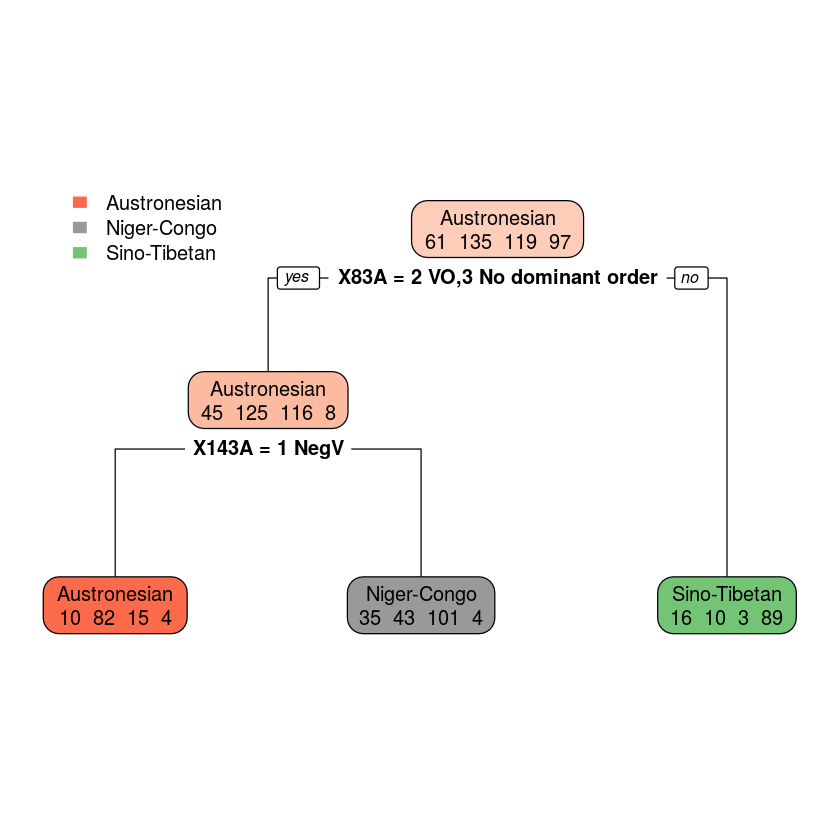

In [14]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example2)
rpart.plot(tree,extra = 1)

In [15]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X143A X83A 

Root node error: 277/412 = 0.67233

n= 412 

       CP nsplit rel error  xerror     xstd
1 0.28520      0   1.00000 1.00000 0.034394
2 0.20939      1   0.71480 0.75812 0.036632
3 0.01000      2   0.50542 0.51264 0.034826


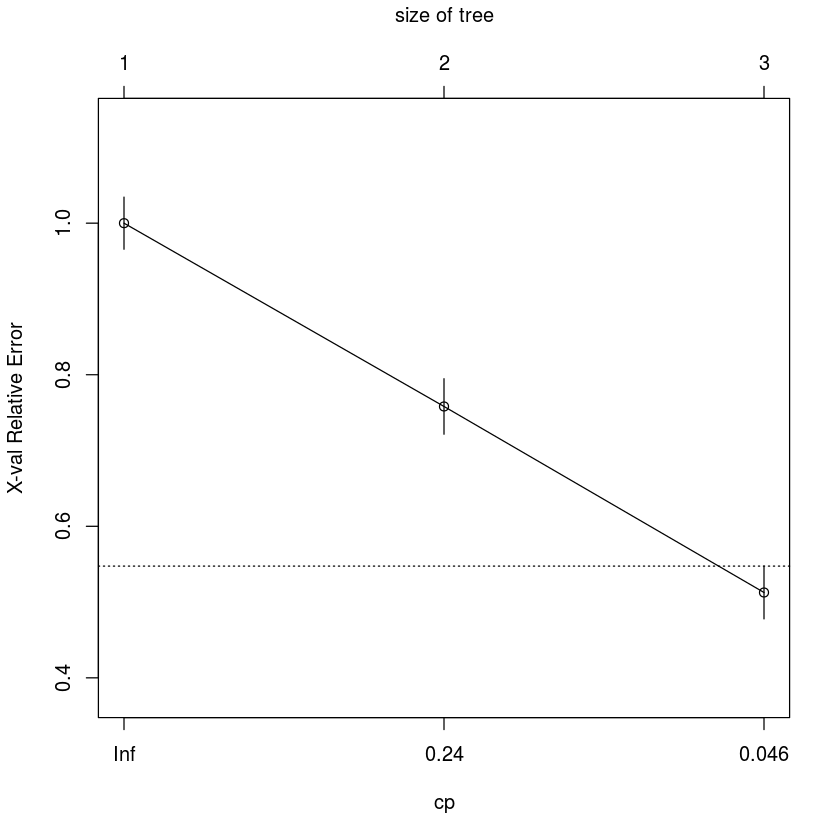

In [16]:
plotcp(tree)

# 2. No Word Order

## Search Criteria:
 - Word Order not included
 - At least 65 languages in most frequent family
 - At least count(top-family) * 0.8 languages in the second, third and fourth families

## Maximal Feature Groups that Meat These Criteria:

In [17]:
g3 = c('112A', '116A', '26A', '33A', '69A')
g4 = c('112A', '116A', '33A', '69A')

In [18]:
example3 = chunk_wals(g3,'family')
head(summary(example3$family))

Austronesian     Sino-Tibetan      Niger-Congo     Afro-Asiatic 
              53               52               49               46 
   Indo-European Trans-New Guinea 
              40               24

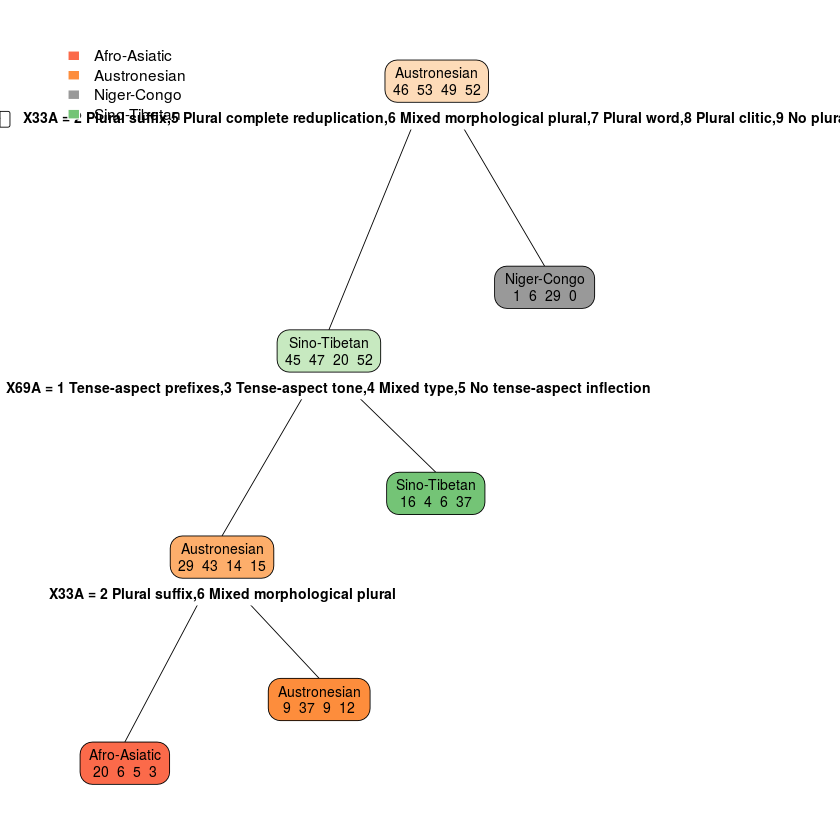

In [19]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example3,minsplit=12,cp=0.05)
rpart.plot(tree,extra = 1,tweak=0.7,fallen=FALSE)

In [20]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X33A X69A

Root node error: 147/200 = 0.735

n= 200 

        CP nsplit rel error  xerror     xstd
1 0.190476      0   1.00000 1.08163 0.038838
2 0.095238      2   0.61905 0.63946 0.048016
3 0.050000      3   0.52381 0.57823 0.047558


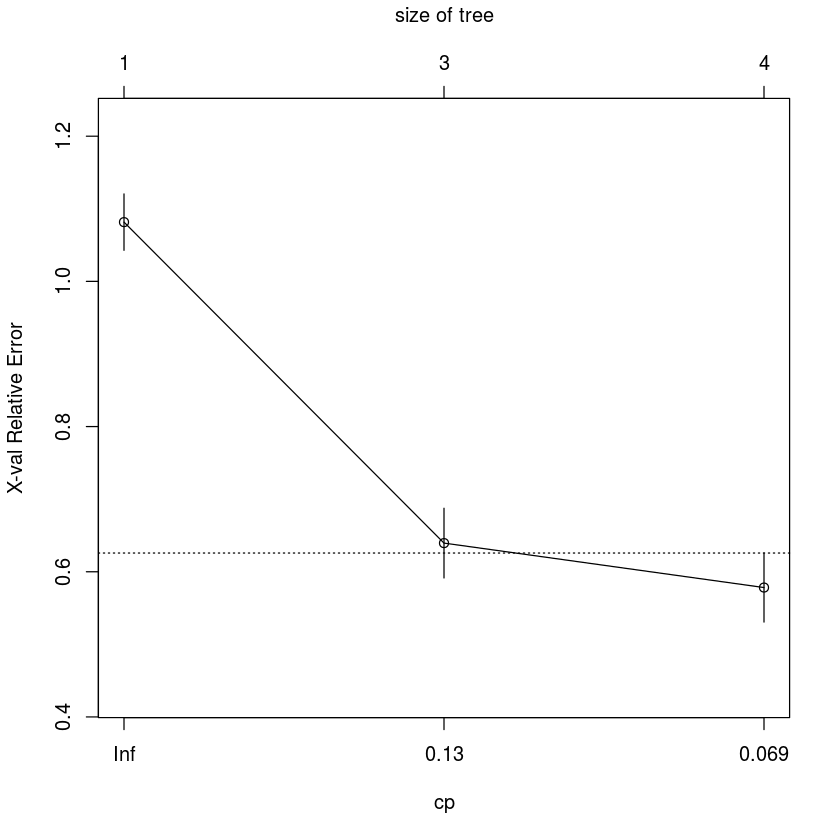

In [21]:
plotcp(tree)

In [22]:
example4 = chunk_wals(g4,'family')
head(summary(example4$family))

Austronesian     Sino-Tibetan      Niger-Congo     Afro-Asiatic 
              54               54               53               47 
   Indo-European Trans-New Guinea 
              41               26

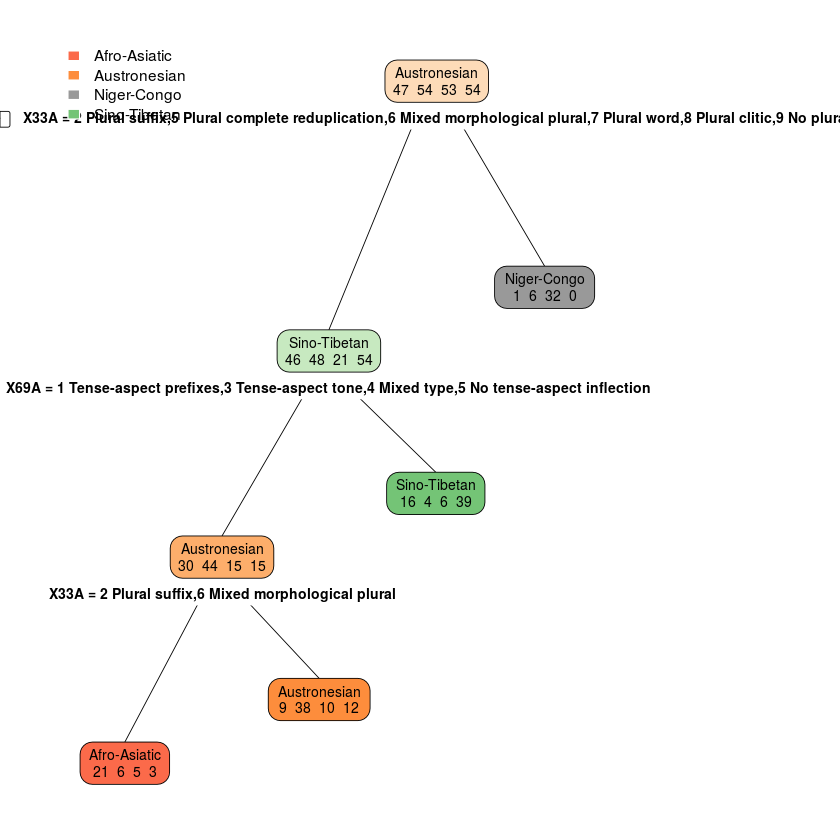

In [23]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example4,minsplit=12,cp=0.05)
rpart.plot(tree,extra = 1,fallen=FALSE,tweak=0.7)

In [24]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X33A X69A

Root node error: 154/208 = 0.74038

n= 208 

        CP nsplit rel error  xerror     xstd
1 0.207792      0   1.00000 1.10390 0.036188
2 0.188312      1   0.79221 0.98052 0.041771
3 0.097403      2   0.60390 0.60390 0.046563
4 0.050000      3   0.50649 0.53247 0.045766


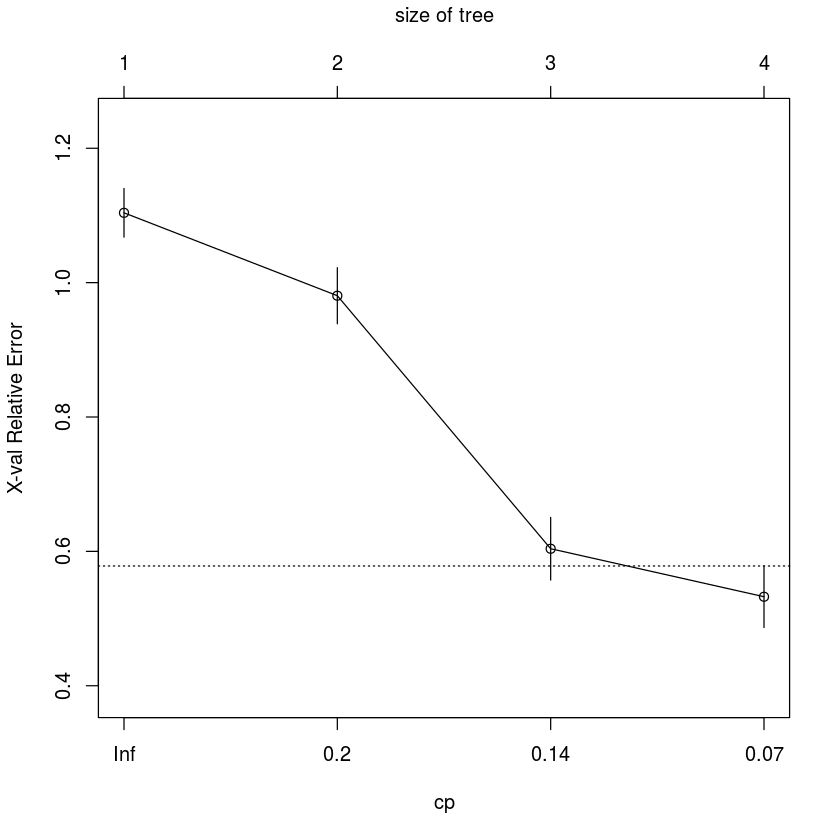

In [25]:
plotcp(tree)

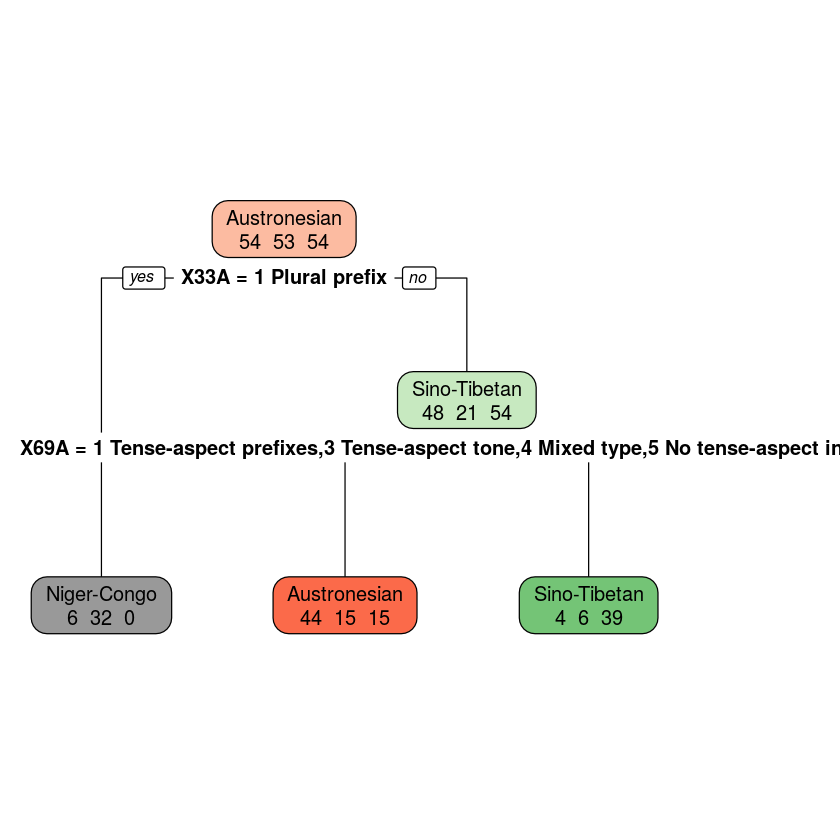

In [26]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan'),example4,minsplit=12,cp=0.05)
rpart.plot(tree,extra = 1)

In [27]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X33A X69A

Root node error: 107/161 = 0.6646

n= 161 

       CP nsplit rel error  xerror     xstd
1 0.29907      0   1.00000 1.14019 0.050806
2 0.27103      1   0.70093 0.95327 0.057139
3 0.05000      2   0.42991 0.48598 0.055452


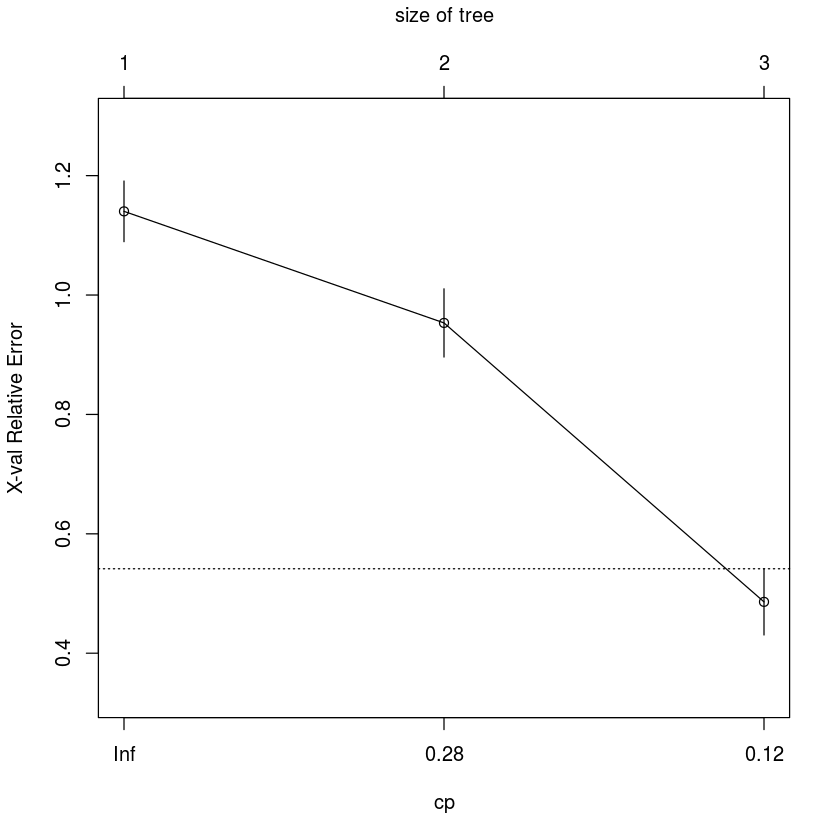

In [28]:
plotcp(tree)

# 3. Just Phonology

## Search Criteria:
 - Only Phonology Features
 - At least 40 languages in most frequent family
 - At least count(top-family) * 0.575 languages in the second and third families

## One 11-features Group that Meets These Criteria:

In [29]:
g5 = c('11A', '18A', '19A', '1A', '2A', '3A', '4A', '5A', '6A', '7A', '8A')
example5 = chunk_wals(g5,'family')
head(summary(example5$family))

Niger-Congo     Austronesian    Indo-European     Afro-Asiatic 
              54               45               31               28 
    Sino-Tibetan Trans-New Guinea 
              26               20

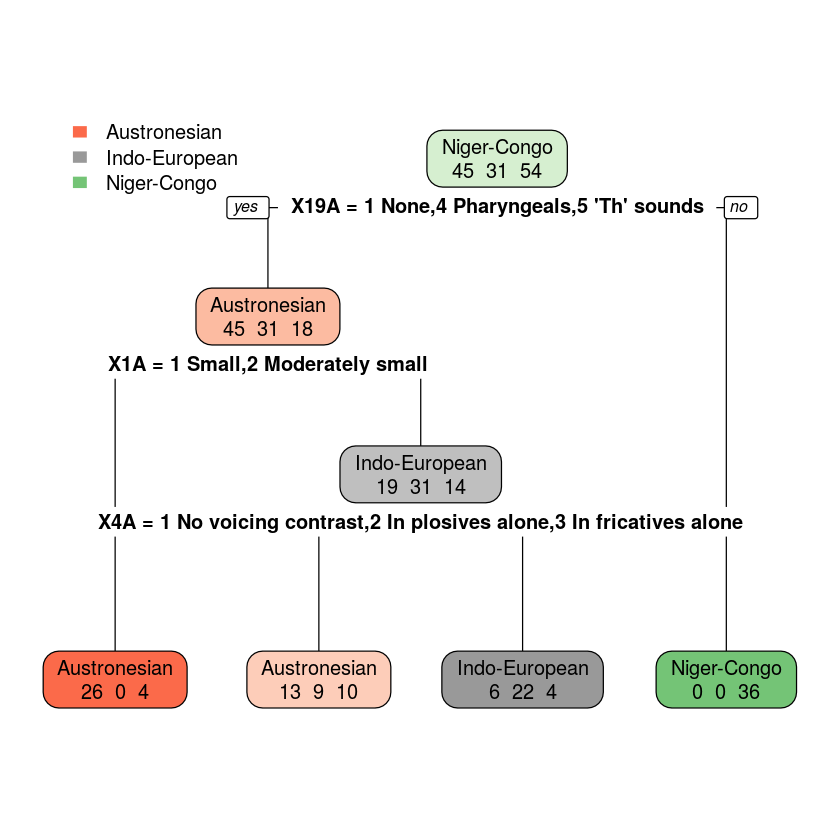

In [30]:
tree <- exampletree(c('Austronesian','Niger-Congo','Indo-European'),example5,minsplit=12,cp=0.05)
rpart.plot(tree,extra = 1)

In [31]:
printcp(tree)


Classification tree:
rpart(formula = family ~ ., data = dat, method = "class", control = c(minsplit = minsplit, 
    cp = cp))

Variables actually used in tree construction:
[1] X19A X1A  X4A 

Root node error: 76/130 = 0.58462

n= 130 

        CP nsplit rel error  xerror     xstd
1 0.355263      0   1.00000 1.00000 0.073930
2 0.157895      1   0.64474 0.64474 0.072703
3 0.052632      2   0.48684 0.52632 0.069241
4 0.050000      3   0.43421 0.52632 0.069241


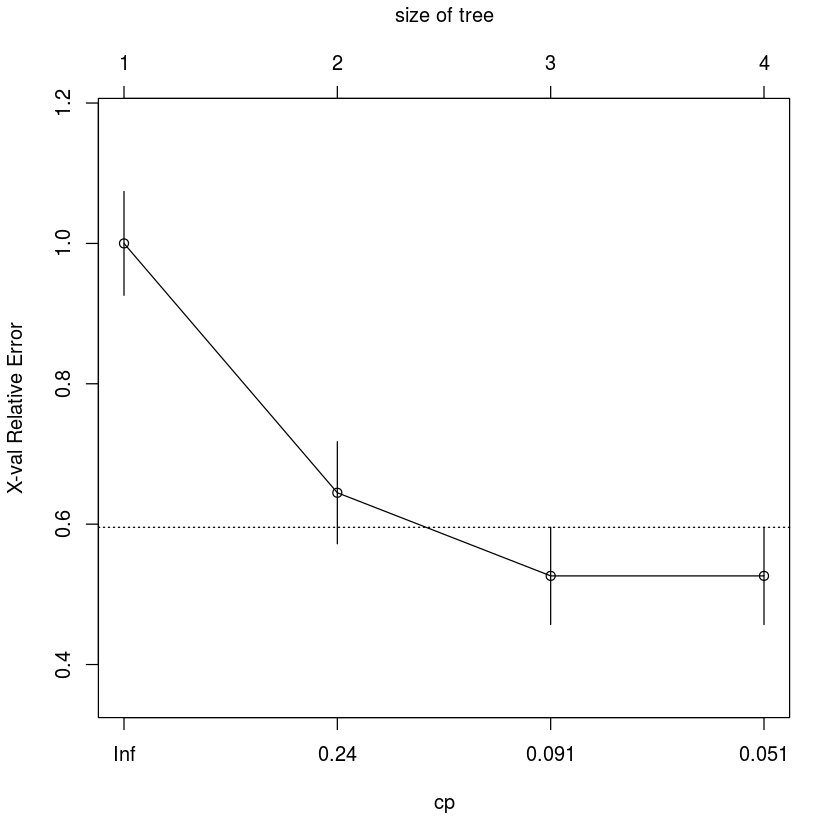

In [32]:
plotcp(tree)